In [1]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from fuzzywuzzy import fuzz

# Specify the path to your .p file
#file_path1 = "/Users/tianyichen/Desktop/Research /PhDresearch/Twitters/2024-06-10-tweets-with-text.p"
file_path2 = "/Users/tianyichen/Desktop/Research /PhDresearch/Twitters/predicted_topics.p"

# Open the file in binary mode
#with open(file_path1, "rb") as file:
#    # Load the data from the file
#    data = pickle.load(file)

with open(file_path2, "rb") as file:
    # Load the data from the file
    topic=pickle.load(file)


/Users/tianyichen/opt/anaconda3/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
topic_shape = len(topic)
print(topic_shape)

2932051


In [3]:
import nomic
import json
nomic.login("nk-2LSEn5FB5h04Dn0pFLuZ9jDw7ZaMbPpYPV88wbKKASc")
#- Scientific programming
import numpy as np
import pandas as pd
from tqdm import tqdm

#- Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#- Data
from nomic import AtlasDataset

#- Processing
from fuzzywuzzy import fuzz
from unidecode import unidecode
import re
import datetime

dataset = AtlasDataset('hivemind/tweets-from-members-of-us-congress-from-all-time-updated-2024-07-12')

df = dataset.maps[0].data.df

#tags_df = dataset.maps[0].tags.df

#df = df.merge(tags_df, on='tweetId')
df.head()

2024-07-18 13:34:04.033 | INFO     | nomic.dataset:__init__:763 - Loading existing dataset `hivemind/tweets-from-members-of-us-congress-from-all-time-updated-2024-07-12`.
2024-07-18 13:34:05.183 | WARNING  | nomic.data_operations:df:923 - Converting to pandas dataframe. This may materialize a large amount of data into memory.
2024-07-18 13:34:05.184 | INFO     | nomic.data_operations:_download_data:902 - Downloading data
100%|██████████| 129/129 [00:00<00:00, 4376.91it/s]
2024-07-18 13:34:06.093 | INFO     | nomic.data_operations:_load_data:872 - Loading data
100%|██████████| 129/129 [00:03<00:00, 40.70it/s] 


,tweetId,postedAt,name,state,party,twitter_lower,chamber,years,source,id,text
0,1065633444502224896,2018-11-22 15:49:46.338,Ken Buck R-CO,CO,R,repkenbuck,House,2017_2018,PolitWoops,1203633,Happy #Thanksgiving! I hope everyone has a cha...
1,1479108462504136704,2022-01-06 15:11:52.624,Kat Cammack R-FL,FL,R,repkatcammack,House,2021_2022,PolitWoops,2857207,"RT @MorningsMaria: .@RepKatCammack: ""The Democ..."
2,85108215381102592,2011-06-26 22:12:34.438,Dennis Ross R-FL,FL,R,repdennisross,House,2011_2012,PolitWoops,35353,@CEP_Observer will have to check that out.
3,925691081026621440,2017-11-01 11:48:46.882,Richard Hudson R-NC,NC,R,reprichhudson,House,2017_2018,PolitWoops,954870,RT @BGClubCab: Thanks to @CharlotteWBB for hel...
4,1435963943533568000,2021-09-09 13:50:57.715,Chip Roy R-TX,TX,R,repchiproy,House,2021_2022,PolitWoops,2324693,RT @chiproytx: No. https://t.co/STZW0DdDz1


In [10]:
df['postedAtyear'] = df['postedAt'].dt.year
df['year_month'] = df['postedAt'].dt.to_period('M')
data_num = df.drop('text', axis=1) ## drop the text column

In [5]:
len(topic)


2932051

In [6]:
df

,tweetId,postedAt,name,state,party,twitter_lower,chamber,years,source,id,text,postedAtyear,year_month
0,1065633444502224896,2018-11-22 15:49:46.338,Ken Buck R-CO,CO,R,repkenbuck,House,2017_2018,PolitWoops,1203633,Happy #Thanksgiving! I hope everyone has a cha...,2018,2018-11
1,1479108462504136704,2022-01-06 15:11:52.624,Kat Cammack R-FL,FL,R,repkatcammack,House,2021_2022,PolitWoops,2857207,"RT @MorningsMaria: .@RepKatCammack: ""The Democ...",2022,2022-01
2,85108215381102592,2011-06-26 22:12:34.438,Dennis Ross R-FL,FL,R,repdennisross,House,2011_2012,PolitWoops,35353,@CEP_Observer will have to check that out.,2011,2011-06
3,925691081026621440,2017-11-01 11:48:46.882,Richard Hudson R-NC,NC,R,reprichhudson,House,2017_2018,PolitWoops,954870,RT @BGClubCab: Thanks to @CharlotteWBB for hel...,2017,2017-11
4,1435963943533568000,2021-09-09 13:50:57.715,Chip Roy R-TX,TX,R,repchiproy,House,2021_2022,PolitWoops,2324693,RT @chiproytx: No. https://t.co/STZW0DdDz1,2021,2021-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130598,1658175462785400834,2023-05-15 18:20:12.000,"Harder, Josh",CA,D,repjoshharder,House,N/A,NOMIC,nomic_275757,"Today, we honor the fallen law enforcement off...",2023,2023-05
3130599,525693206202023936,2014-10-24 17:00:01.923,Mike Fitzpatrick R-PA,PA,R,repfitzpatrick,House,2013_2014,PolitWoops,333759,"""While Bobby’s passing is a tragedy, the compl...",2014,2014-10
3130600,928740721175252992,2017-11-09 21:46:57.753,Roger Williams R-TX,TX,R,reprwilliams,House,2017_2018,PolitWoops,947505,Without the brave heroism from USCP Special Ag...,2017,2017-11
3130601,958753799623073792,2018-01-31 17:28:13.271,Cory Gardner R-CO,CO,R,sencorygardner,Senate,2017_2018,PolitWoops,1407545,God be with those injured and their families.,2018,2018-01


In [7]:
df['topic'] = df['id'].map(topic)
df.head()

,tweetId,postedAt,name,state,party,twitter_lower,chamber,years,source,id,text,postedAtyear,year_month,topic
0,1065633444502224896,2018-11-22 15:49:46.338,Ken Buck R-CO,CO,R,repkenbuck,House,2017_2018,PolitWoops,1203633,Happy #Thanksgiving! I hope everyone has a cha...,2018,2018-11,National Security and Foreign Policy
1,1479108462504136704,2022-01-06 15:11:52.624,Kat Cammack R-FL,FL,R,repkatcammack,House,2021_2022,PolitWoops,2857207,"RT @MorningsMaria: .@RepKatCammack: ""The Democ...",2022,2022-01,National Security and Foreign Policy
2,85108215381102592,2011-06-26 22:12:34.438,Dennis Ross R-FL,FL,R,repdennisross,House,2011_2012,PolitWoops,35353,@CEP_Observer will have to check that out.,2011,2011-06,National Security and Foreign Policy
3,925691081026621440,2017-11-01 11:48:46.882,Richard Hudson R-NC,NC,R,reprichhudson,House,2017_2018,PolitWoops,954870,RT @BGClubCab: Thanks to @CharlotteWBB for hel...,2017,2017-11,Miscellaneous
4,1435963943533568000,2021-09-09 13:50:57.715,Chip Roy R-TX,TX,R,repchiproy,House,2021_2022,PolitWoops,2324693,RT @chiproytx: No. https://t.co/STZW0DdDz1,2021,2021-09,Miscellaneous


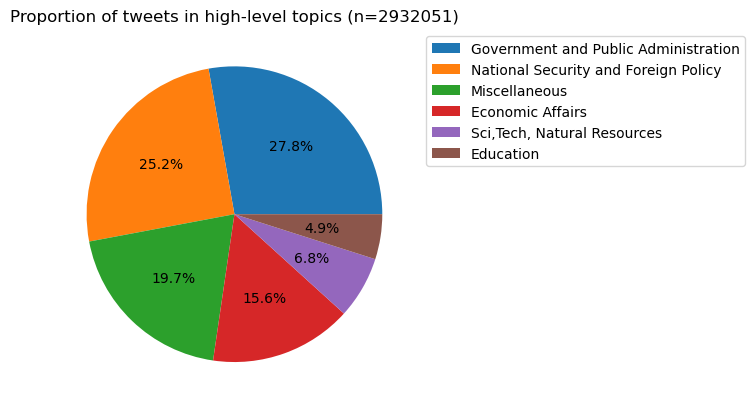

In [8]:
from collections import Counter
topic_counts = Counter(topic.values())

top_topics = topic_counts.most_common(6)
labels = [topic[0] for topic in top_topics]
counts = [topic[1] for topic in top_topics]

labels, counts

plt.pie(counts, autopct='%1.1f%%')
plt.title(f'Proportion of tweets in high-level topics (n={len(topic)})')

legend_labels = ['Government and Public Administration',
 'National Security and Foreign Policy',
 'Miscellaneous',
 'Economic Affairs',
 'Sci,Tech, Natural Resources',
 'Education']
plt.legend(legend_labels, bbox_to_anchor=(1, 1))

plt.show()


In [140]:
num_tweets_per_topic_per_year = df.groupby(['topic', 'postedAtyear']).size().reset_index(name='tweets_count')
tweets_per_topic_year_pivot = num_tweets_per_topic_per_year.pivot(index='topic', columns='postedAtyear', values='tweets_count')

fil = tweets_per_topic_year_pivot[tweets_per_topic_year_pivot.index.isin(labels)]
fil

fil_proportion = fil.div(fil.sum())
fil_proportion

postedAtyear,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
topic,,,,,,,,,,,,,,
Economic Affairs,0.286524,0.241277,0.193166,0.170991,0.136884,0.104660,0.152273,0.147665,0.112597,0.149098,0.177595,0.172153,0.147333,0.143975
Education,0.036151,0.048931,0.055121,0.063952,0.063512,0.056990,0.039643,0.054627,0.049099,0.041286,0.039765,0.048443,0.062244,0.059866
Government and Public Administration,0.235931,0.226738,0.269890,0.221204,0.238024,0.239044,0.303636,0.273831,0.308029,0.339798,0.285042,0.268261,0.215364,0.219101
Miscellaneous,0.228896,0.243864,0.232777,0.255148,0.253887,0.270918,0.209633,0.184535,0.168790,0.175325,0.168584,0.151220,0.158208,0.160039
National Security and Foreign Policy,0.156594,0.179921,0.197369,0.217923,0.230130,0.250529,0.236692,0.272692,0.284823,0.232240,0.257767,0.290037,0.346365,0.345110
"Science, Technology, and Natural Resources",0.055904,0.059269,0.051676,0.070782,0.077563,0.077859,0.058123,0.066649,0.076662,0.062253,0.071247,0.069886,0.070485,0.071910


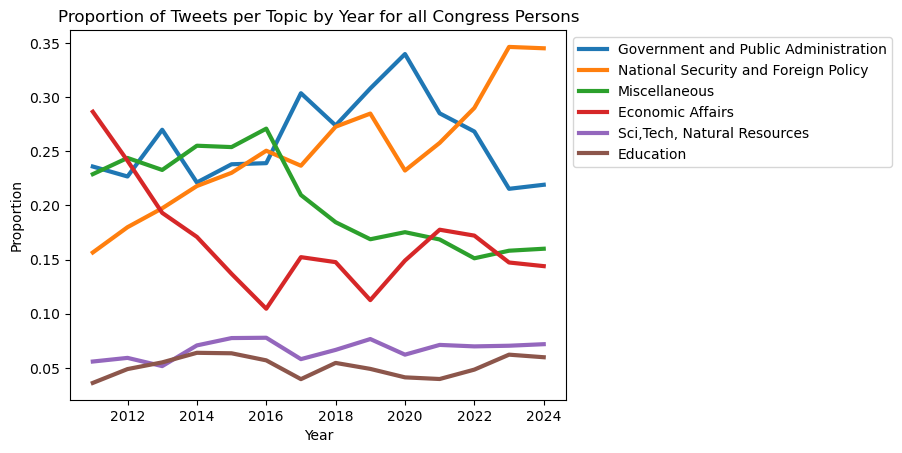

In [141]:
year=fil.columns
plt.plot(year, fil_proportion.loc['Government and Public Administration'], label='Government and Public Administration',lw=3)
plt.plot(year, fil_proportion.loc['National Security and Foreign Policy'], label='National Security and Foreign Policy',lw=3)
plt.plot(year, fil_proportion.loc['Miscellaneous'], label='Miscellaneous',lw=3)
plt.plot(year, fil_proportion.loc['Economic Affairs'], label='Economic Affairs',lw=3)
plt.plot(year, fil_proportion.loc['Science, Technology, and Natural Resources'], label='Sci Tech and Natural Resources',lw=3)
plt.plot(year, fil_proportion.loc['Education'], label='Education',lw=3)

plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title('Proportion of Tweets per Topic by Year for all Congress Persons')
plt.legend(legend_labels, bbox_to_anchor=(1, 1))

plt.show()


In [93]:
df.head()

,tweetId,postedAt,name,state,party,twitter_lower,chamber,years,source,text,id,postedAtyear,topic,year_month
0,1065633444502224896,2018-11-22 15:49:46.338,Ken Buck R-CO,CO,R,repkenbuck,House,2017_2018,PolitWoops,Happy #Thanksgiving! I hope everyone has a cha...,1203633,2018,National Security and Foreign Policy,2018-11
1,1479108462504136704,2022-01-06 15:11:52.624,Kat Cammack R-FL,FL,R,repkatcammack,House,2021_2022,PolitWoops,"RT @MorningsMaria: .@RepKatCammack: ""The Democ...",2857207,2022,National Security and Foreign Policy,2022-01
2,85108215381102592,2011-06-26 22:12:34.438,Dennis Ross R-FL,FL,R,repdennisross,House,2011_2012,PolitWoops,@CEP_Observer will have to check that out.,35353,2011,National Security and Foreign Policy,2011-06
3,925691081026621440,2017-11-01 11:48:46.882,Richard Hudson R-NC,NC,R,reprichhudson,House,2017_2018,PolitWoops,RT @BGClubCab: Thanks to @CharlotteWBB for hel...,954870,2017,Miscellaneous,2017-11
4,1435963943533568000,2021-09-09 13:50:57.715,Chip Roy R-TX,TX,R,repchiproy,House,2021_2022,PolitWoops,RT @chiproytx: No. https://t.co/STZW0DdDz1,2324693,2021,Miscellaneous,2021-09


In [95]:
congress_info= df.iloc[:, [2,3,4,6]].drop_duplicates()
congress_info

,name,state,party,chamber
0,Ken Buck R-CO,CO,R,House
1,Kat Cammack R-FL,FL,R,House
2,Dennis Ross R-FL,FL,R,House
3,Richard Hudson R-NC,NC,R,House
4,Chip Roy R-TX,TX,R,House
...,...,...,...,...
337249,Howard Berman D-CA,CA,D,House
566272,Kyrsten Sinema D-AZ,AZ,D,Senate
740921,Lynn Woolsey D-CA,CA,D,House
2105976,"Moulton, Seth",MA,D,House


In [108]:
congress_info['party'].value_counts().sort_index()

D    561
R    607
I      4
Name: party, dtype: int64

In [109]:
congress_info['chamber'].value_counts().sort_index()

Senate    204
House     968
Name: chamber, dtype: int64

In [112]:
num=df['year_month'].value_counts().sort_index()

Text(0.5, 1.0, 'Num of tweets of Year-Month')

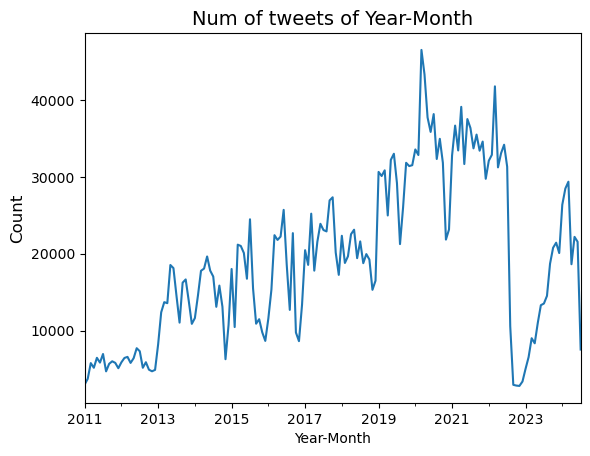

In [120]:
num.plot()
plt.xlabel('Year-Month')
plt.ylabel('Count', fontsize=12)
plt.title('Num of tweets of Year-Month', fontsize=14)

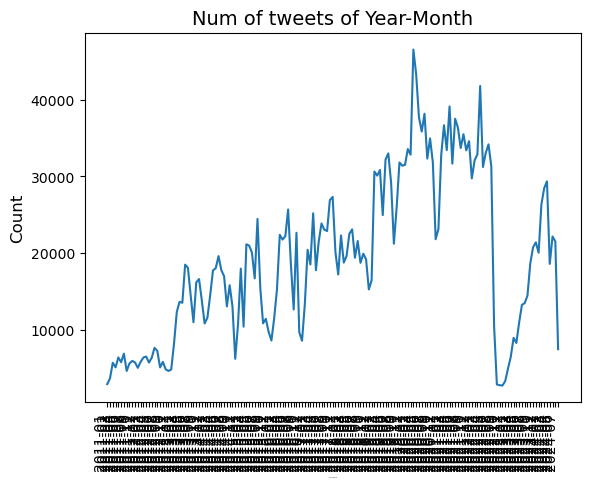

In [118]:
plt.plot(num.index.astype(str), num)
plt.xlabel('Year-Month', fontsize=.0001)
plt.ylabel('Count', fontsize=12)
plt.title('Num of tweets of Year-Month', fontsize=14)

plt.xticks(rotation=90, ha='right')

# Add a vertical line at October 28, 2022
#plt.axvline(x=141, color='red', linestyle='--', label='Musk takes over')

plt.show()


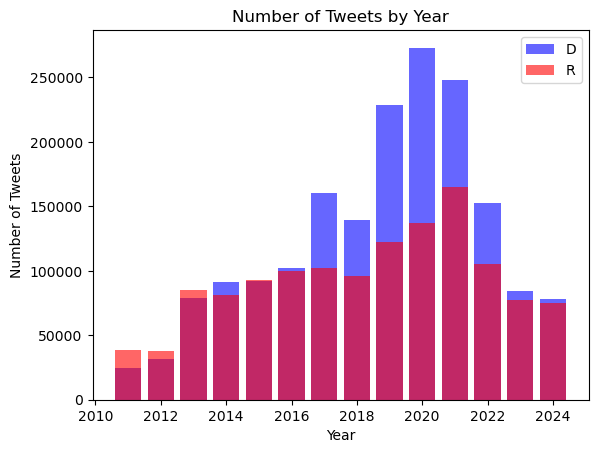

In [124]:
data_d = df.loc[df['party'] == 'D', 'postedAt'].dt.year.value_counts().sort_index()

data_r = df.loc[df['party'] == 'R', 'postedAt'].dt.year.value_counts().sort_index()

plt.bar(data_d.index, data_d.values, color='blue', alpha=0.6, label='D')
plt.bar(data_r.index, data_r.values, color='red', alpha=0.6, label='R')

plt.title('Number of Tweets by Year')
plt.xlabel('Year')
plt.ylabel('Number of Tweets')

plt.legend()

plt.show()


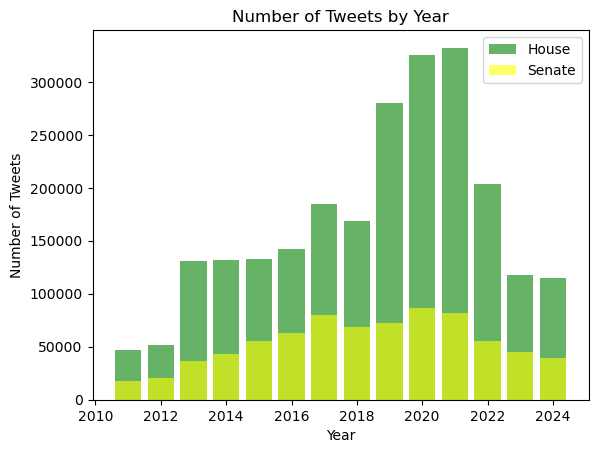

In [125]:
data_h = df.loc[df['chamber'] == 'House', 'postedAt'].dt.year.value_counts().sort_index()

data_s = df.loc[df['chamber'] == 'Senate', 'postedAt'].dt.year.value_counts().sort_index()

plt.bar(data_h.index, data_h.values, color='green', alpha=0.6, label='House')
plt.bar(data_s.index, data_s.values, color='yellow', alpha=0.6, label='Senate')

plt.title('Number of Tweets by Year')
plt.xlabel('Year')
plt.ylabel('Number of Tweets')

plt.legend()

plt.show()

In [ ]:
num_tweets_per_topic_per_year = df.groupby(['topic', 'postedAtyear']).size().reset_index(name='tweets_count')
tweets_per_topic_year_pivot = num_tweets_per_topic_per_year.pivot(index='topic', columns='postedAtyear', values='tweets_count')

fil = tweets_per_topic_year_pivot[tweets_per_topic_year_pivot.index.isin(labels)]
fil

fil_proportion = fil.div(fil.sum())
fil_proportion

In [126]:
df.head()

,tweetId,postedAt,name,state,party,twitter_lower,chamber,years,source,text,id,postedAtyear,topic,year_month
0,1065633444502224896,2018-11-22 15:49:46.338,Ken Buck R-CO,CO,R,repkenbuck,House,2017_2018,PolitWoops,Happy #Thanksgiving! I hope everyone has a cha...,1203633,2018,National Security and Foreign Policy,2018-11
1,1479108462504136704,2022-01-06 15:11:52.624,Kat Cammack R-FL,FL,R,repkatcammack,House,2021_2022,PolitWoops,"RT @MorningsMaria: .@RepKatCammack: ""The Democ...",2857207,2022,National Security and Foreign Policy,2022-01
2,85108215381102592,2011-06-26 22:12:34.438,Dennis Ross R-FL,FL,R,repdennisross,House,2011_2012,PolitWoops,@CEP_Observer will have to check that out.,35353,2011,National Security and Foreign Policy,2011-06
3,925691081026621440,2017-11-01 11:48:46.882,Richard Hudson R-NC,NC,R,reprichhudson,House,2017_2018,PolitWoops,RT @BGClubCab: Thanks to @CharlotteWBB for hel...,954870,2017,Miscellaneous,2017-11
4,1435963943533568000,2021-09-09 13:50:57.715,Chip Roy R-TX,TX,R,repchiproy,House,2021_2022,PolitWoops,RT @chiproytx: No. https://t.co/STZW0DdDz1,2324693,2021,Miscellaneous,2021-09


In [37]:
CJ=data.loc[data['name'] == 'Cornyn, John', :]
CJ.head()

,name,party,twitter_lower,years,chamber,state,postedAt,source,tweetId,name_standardized,text,postedAtyear
9657,"Cornyn, John",R,johncornyn,N/A,Senate,TX,2024-03-01 13:38:58,NOMIC,1763559556943069283,john_cornyn,Both chambers of the Alabama Legislature have ...,2024
16575,"Cornyn, John",R,johncornyn,N/A,Senate,TX,2024-02-28 18:20:02,NOMIC,1762905514529198227,john_cornyn,Senator McConnell's announcement that he will ...,2024
16827,"Cornyn, John",R,johncornyn,N/A,Senate,TX,2024-06-06 10:41:50,NOMIC,1798666605188268457,john_cornyn,Immigration Named Top U.S. Problem for Third S...,2024
19863,"Cornyn, John",R,johncornyn,N/A,Senate,TX,2024-03-31 13:05:15,NOMIC,1774422710413648237,john_cornyn,How culture trumps economic class as the new p...,2024
20179,"Cornyn, John",R,johncornyn,N/A,Senate,TX,2024-02-13 14:56:55,NOMIC,1757418581384474930,john_cornyn,,2024


In [11]:
num_tweets_per_cp_per_year = data_num.groupby(['name', 'postedAtyear']).size().reset_index(name='tweets_count')
tweets_per_cp_year_pivot = num_tweets_per_cp_per_year.pivot(index='name', columns='postedAtyear', values='tweets_count')


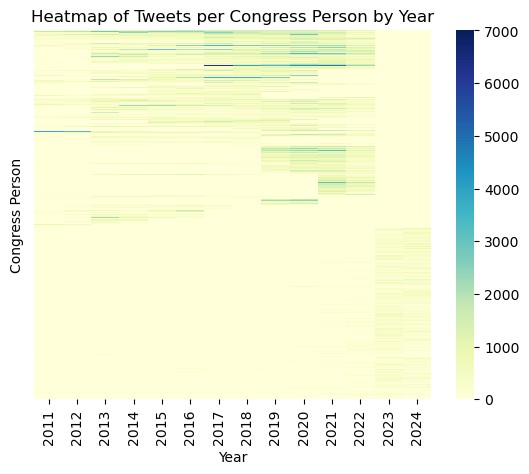

In [17]:
sns.heatmap(tweets_per_cp_year_pivot, cmap='YlGnBu', xticklabels=True,yticklabels=False)
plt.title('Heatmap of Tweets per Congress Person by Year')
plt.xlabel('Year')
plt.ylabel('Congress Person')
plt.show()


In [96]:
merged_df = pd.merge(congress_info, tweets_per_cp_year_pivot, on='name')
merged_df.head()

,name,state,party,chamber,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Ken Buck R-CO,CO,R,House,0,0,0,0,516,414,178,180,234,0,0,0,0,0
1,Kat Cammack R-FL,FL,R,House,0,0,0,0,0,0,0,0,0,0,2266,1071,0,0
2,Dennis Ross R-FL,FL,R,House,3773,3206,774,783,347,368,527,97,0,0,0,0,0,0
3,Richard Hudson R-NC,NC,R,House,0,0,1043,924,657,711,751,804,750,640,622,267,0,0
4,Chip Roy R-TX,TX,R,House,0,0,0,0,0,0,0,0,1723,1149,1930,1850,0,0


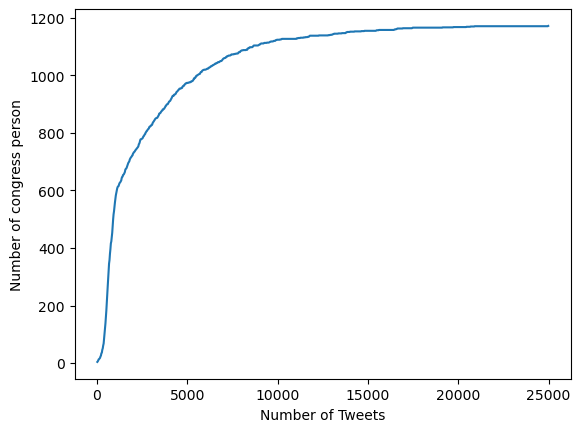

In [144]:
merged_df['sum'] = merged_df.loc[:, 2011:2024].sum(axis=1)

values = merged_df.loc[:, 'sum']

hist, bin_edges = np.histogram(values, bins=1000, density=False)
cdf = np.cumsum(hist)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Number of Tweets')
plt.ylabel('Number of congress person')
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


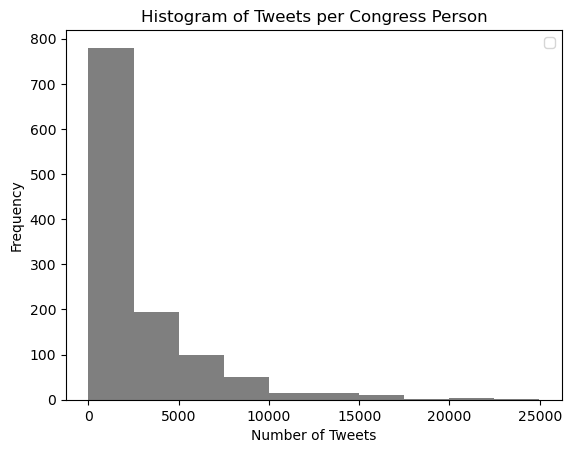

In [142]:
d_tweets = merged_df.loc[:, 'sum']

plt.hist(d_tweets, color='black', alpha=0.5) 
plt.xlabel('Number of Tweets') 
plt.ylabel('Frequency') 
plt.title('Histogram of Tweets per Congress Person') 
plt.legend() 
plt.show()

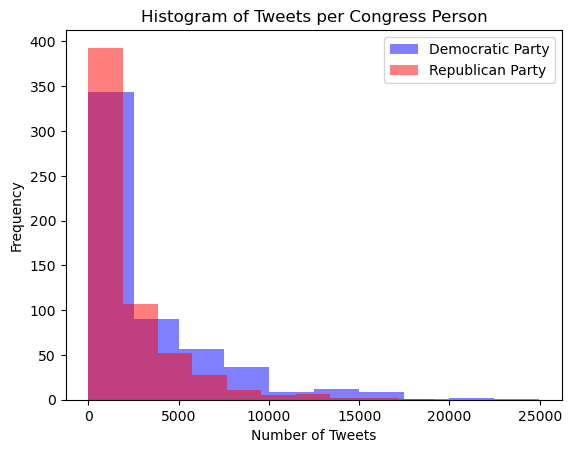

In [145]:
d_tweets = merged_df.loc[merged_df['party'] == 'D', 'sum']
r_tweets = merged_df.loc[merged_df['party'] == 'R', 'sum']

plt.hist(d_tweets, color='blue', alpha=0.5, label='Democratic Party') 
plt.hist(r_tweets, color='red', alpha=0.5, label='Republican Party') 
plt.xlabel('Number of Tweets') 
plt.ylabel('Frequency') 
plt.title('Histogram of Tweets per Congress Person') 
plt.legend() 
plt.show()

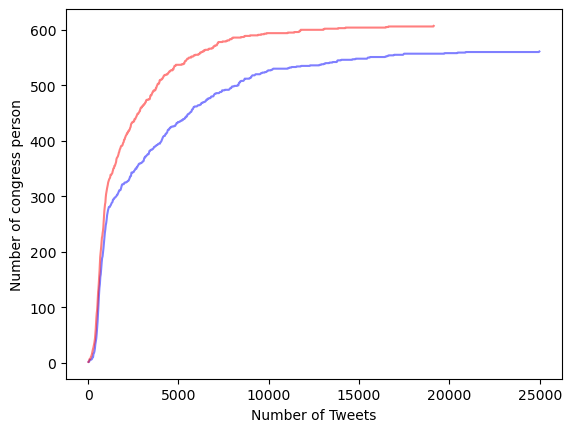

In [146]:
hist1, bin_edges1 = np.histogram(d_tweets, bins=1000, density=False)
cdf1 = np.cumsum(hist1)

hist2, bin_edges2 = np.histogram(r_tweets, bins=1000, density=False)
cdf2 = np.cumsum(hist2)

plt.plot(bin_edges1[1:], cdf1,color='blue', alpha=0.5, label='Democratic Party')
plt.plot(bin_edges2[1:], cdf2,color='red', alpha=0.5, label='republican Party')

plt.xlabel('Number of Tweets')
plt.ylabel('Number of congress person')
plt.show()

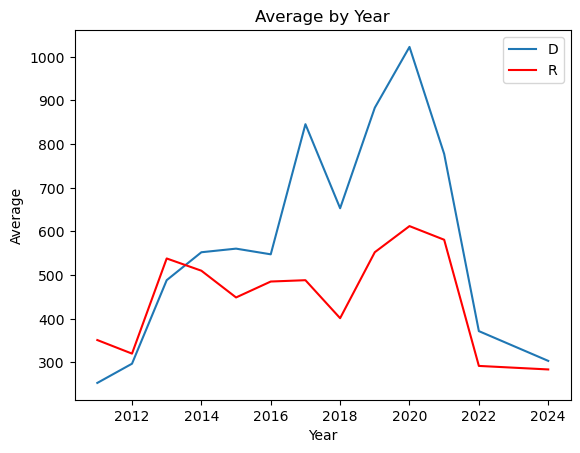

In [130]:
d_avg = []
r_avg = []
for year in range(2011, 2025):
    if year == 2023:
        continue
    d_avg.append(merged_df.loc[merged_df['party'] == 'D', year].sum() / merged_df.loc[merged_df['party'] == 'D', year].astype(bool).sum())
    r_avg.append(merged_df.loc[merged_df['party'] == 'R', year].sum() / merged_df.loc[merged_df['party'] == 'R', year].astype(bool).sum())


years = list(range(2011, 2025))
years.remove(2023)

plt.plot(years, d_avg, label='D')
plt.plot(years, r_avg, label='R',color='red')
plt.xlabel('Year')
plt.ylabel('Average')
plt.title('Average by Year')
plt.legend()
plt.show()


In [132]:
top_10_people = merged_df.nlargest(10, 'sum')
top_10_people_names = top_10_people['name'].tolist()
print(top_10_people_names)

## most tweeted congress person 
fil_df=df.loc[df['name'] == top_10_people_names[0], :]
fil_df.head()

['Pramila Jayapal D-WA', 'Dwight Evans D-PA', 'Bernard Sanders I-VT', 'Dick Durbin D-IL', 'Chuck Schumer D-NY', 'Rob Portman R-OH', 'Sheldon Whitehouse D-RI', 'Eric Swalwell D-CA', 'Richard Blumenthal D-CT', 'Tammy Baldwin D-WI']


,tweetId,postedAt,name,state,party,twitter_lower,chamber,years,source,text,id,postedAtyear,topic,year_month
33,1131281405382676480,2019-05-22 19:31:19.892,Pramila Jayapal D-WA,WA,D,repjayapal,House,2019_2020,PolitWoops,RT @RepDebDingell: Our nation is facing a cris...,1642031,2019,National Security and Foreign Policy,2019-05
679,1281674807604436992,2020-07-10 19:41:01.156,Pramila Jayapal D-WA,WA,D,repjayapal,House,2019_2020,PolitWoops,RT @LCVoters: NEPA empowers communities. It sh...,1961906,2020,Government and Public Administration,2020-07
753,1390063760757379072,2021-05-05 22:00:01.357,Pramila Jayapal D-WA,WA,D,repjayapal,House,2021_2022,PolitWoops,ICYMI: Be sure to tune in tomorrow \nhttps://t...,2469833,2021,Miscellaneous,2021-05
854,822499157441028096,2017-01-20 17:40:55.086,Pramila Jayapal D-WA,WA,D,repjayapal,House,2017_2018,PolitWoops,"I'm meeting with immigrants - workers, student...",1170062,2017,Government and Public Administration,2017-01
887,856592141610434560,2017-04-24 19:34:15.929,Pramila Jayapal D-WA,WA,D,repjayapal,House,2017_2018,PolitWoops,"RT @MomsRising: ""Going to marches proves that ...",1105057,2017,"Science, Technology, and Natural Resources",2017-04


In [135]:
num_tweets_per_topic_per_year_fil = fil_df.groupby(['topic', 'postedAtyear']).size().reset_index(name='tweets_count')
tweets_per_topic_year_pivot_fil = num_tweets_per_topic_per_year_fil.pivot(index='topic', columns='postedAtyear', values='tweets_count')
tweets_per_topic_year_pivot_fil 

postedAtyear,2017,2018,2019,2020,2021,2022
topic,,,,,,
Economic Affairs,791.0,311.0,373.0,884.0,1311.0,423.0
Education,224.0,114.0,132.0,80.0,155.0,129.0
Government and Public Administration,2289.0,1444.0,1414.0,1684.0,1719.0,944.0
Health and Human Services,NaN,NaN,NaN,1.0,NaN,NaN
Health and Public Safety,NaN,NaN,NaN,NaN,NaN,1.0
Health and Social Services,2.0,NaN,1.0,NaN,NaN,NaN
Healthcare,NaN,NaN,1.0,NaN,NaN,NaN
"I'm sorry, but I cannot access external content such as tweets. If you can provide a brief summary or description of the tweet, I would be happy to help you determine the most appropriate topic for it.",NaN,NaN,NaN,NaN,1.0,NaN
Immigration and border issues,NaN,1.0,NaN,NaN,NaN,NaN


In [136]:

fil = tweets_per_topic_year_pivot_fil[tweets_per_topic_year_pivot_fil .index.isin(labels)]
fil

fil_proportion = fil.div(fil.sum())
fil_proportion

postedAtyear,2017,2018,2019,2020,2021,2022
topic,,,,,,
Economic Affairs,0.125556,0.080905,0.107835,0.205390,0.281633,0.180077
Education,0.035556,0.029657,0.038161,0.018587,0.033298,0.054917
Government and Public Administration,0.363333,0.375650,0.408789,0.391264,0.369280,0.401873
Miscellaneous,0.193968,0.197190,0.124024,0.137546,0.108700,0.096637
National Security and Foreign Policy,0.238571,0.272112,0.279850,0.213058,0.158110,0.200085
"Science, Technology, and Natural Resources",0.043016,0.044485,0.041341,0.034154,0.048980,0.066411


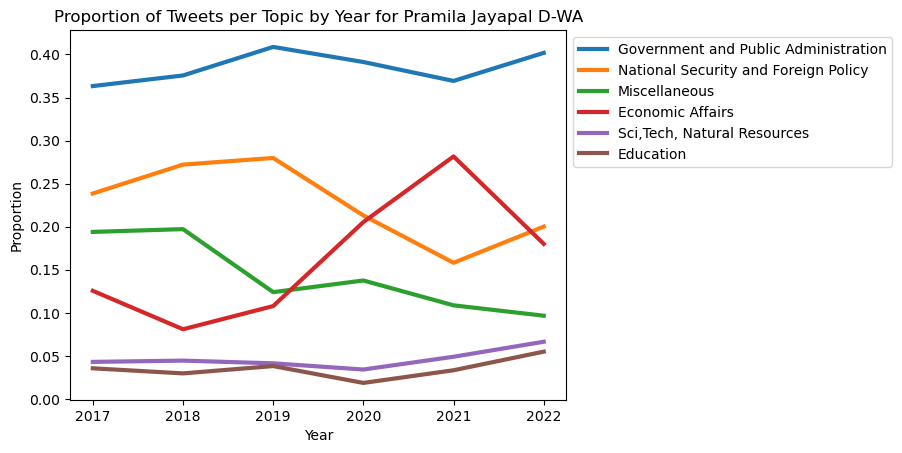

In [138]:
year=fil.columns
plt.plot(year, fil_proportion.loc['Government and Public Administration'], label='Government and Public Administration',lw=3)
plt.plot(year, fil_proportion.loc['National Security and Foreign Policy'], label='National Security and Foreign Policy',lw=3)
plt.plot(year, fil_proportion.loc['Miscellaneous'], label='Miscellaneous',lw=3)
plt.plot(year, fil_proportion.loc['Economic Affairs'], label='Economic Affairs',lw=3)
plt.plot(year, fil_proportion.loc['Science, Technology, and Natural Resources'], label='Sci Tech and Natural Resources',lw=3)
plt.plot(year, fil_proportion.loc['Education'], label='Education',lw=3)

plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title('Proportion of Tweets per Topic by Year for Pramila Jayapal D-WA')
plt.legend(legend_labels, bbox_to_anchor=(1, 1))

plt.show()